In [1]:
#!/usr/bin/python

# Diego Calanzone
# 17-01-2021
# SWE - Task 00

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from optparse import OptionParser

# -----------

def txt_to_numpy(filename, line_skip = 5):
    f = open (filename, 'r')
    data = f.readlines()[line_skip:]

    return np.asarray(
        [l.replace("\n", "").split() for l in data]
    ).astype(np.float32)

def numpy_to_txt(filename, data):
    file = open(filename, "w+")
    for row in data:
        row.resize(1,row.shape[0])
        np.savetxt(file, row, fmt="%i", newline='\n', delimiter=' ')

    file.close()

# -----------

out_dir =  "output_16-01-2021_09.35"
n_bcc = 30
prefix = "toce_ris_V17_50"
exp_numpy = 0

prefix_dir = "output/{}/decoded_".format(out_dir)
btm_file = "{}-decoded-last.BTM".format(prefix)
maxwse_file = "{}-decoded-last.MAXWSE".format(prefix)

plots_dir = "output/{}/plots".format(out_dir)
targets_dir = "output/{}/targets".format(out_dir)

# -----------

# Check & creating dirs
if not os.path.isdir(plots_dir): os.mkdir(plots_dir)
if not os.path.isdir(targets_dir): 
    os.mkdir(targets_dir)
    os.mkdir("{}/5mm/".format(targets_dir))
    os.mkdir("{}/1mm/".format(targets_dir))

# option numpy
if exp_numpy:
    targets_5mm = []
    targets_1mm = []

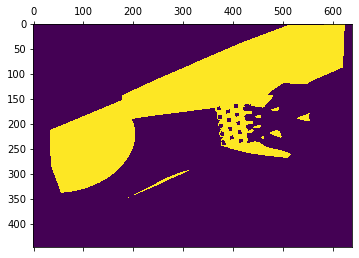

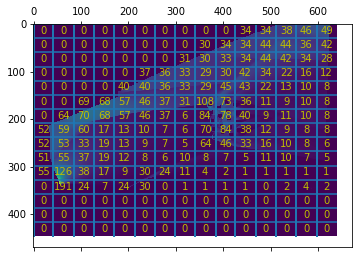

In [11]:
bcc = 0

source = "{}{:03d}".format(prefix_dir, bcc)

btm = txt_to_numpy("{}/{}".format(source, btm_file))
maxwse = txt_to_numpy("{}/{}".format(source, maxwse_file))

# Rimozione valori soglia
btm[btm > 1e10] = 0
maxwse[maxwse > 1e10] = 0

# Generazione matrici target
result = maxwse - btm
result[result < 0] = 0

binary_5mm = (result >= 8)
binary_1mm = (result >= 1e-3)

#plt.matshow((result >= 8))
#plt.matshow((result >= 10))
#plt.matshow((result >= 20))

# -> numpy
if exp_numpy:
    targets_5mm.append(binary_5mm)
    targets_1mm.append(binary_1mm)

tiles = 15

# righ
plt.matshow(result)
for i in range(tiles):

    starty = int(result.shape[0] / tiles * i)
    endy = int(starty + result.shape[0] / tiles)

    # colonne
    for j in range(tiles):
        startx = int(result.shape[1] / tiles * j)
        endx = int(startx + result.shape[1] / tiles)
        plt.vlines(startx, 0, result.shape[0])

        plt.text(int((startx + endx) /2), int((starty + endy) /2), "{:.0f}".format(np.max(result[starty:endy, startx:endx])), horizontalalignment='center', verticalalignment='center', color="y")
    
    plt.hlines(starty, 0, result.shape[1])

plt.show()